**Importing Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Scikit-Learn modules for model selection and preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Import various classifiers from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import classifiers from external libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Import additional ensemble methods from Scikit-Learn
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# For saving and loading models
import joblib

# To ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Description:
# This script sets up an environment for machine learning model development and evaluation.
# It imports various libraries and modules required for data manipulation, visualization, model building,
# hyperparameter tuning, and evaluation. This includes popular classifiers from Scikit-Learn, as well as
# advanced classifiers from the XGBoost and LightGBM libraries.

**Installation of differnet required package**

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

**Read dataset**

In [ ]:
df = pd.read_csv('diabetes1.csv')



**Display data content**

In [ ]:
styled_df = df.head(5).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])


**Define  number of  rows and columns**

In [ ]:
rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 768 
Number of Columns : 9


**Define Basic info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**count null/nam values**

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*0 missing valuses found from above code*

**Description
and Display the styled DataFrame**

In [ ]:
styled_df = df.describe().style \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#254E58'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'left'), ('padding', '8px')]},
        {'selector': 'td', 'props': [('padding', '8px')]}
    ]) \
    .set_properties(**{'font-size': '14px', 'background-color': '#F5F5F5', 'border-collapse': 'collapse', 'margin': '10px'})

# Display the styled DataFrame
styled_df

**importing missing number of data from dataset**

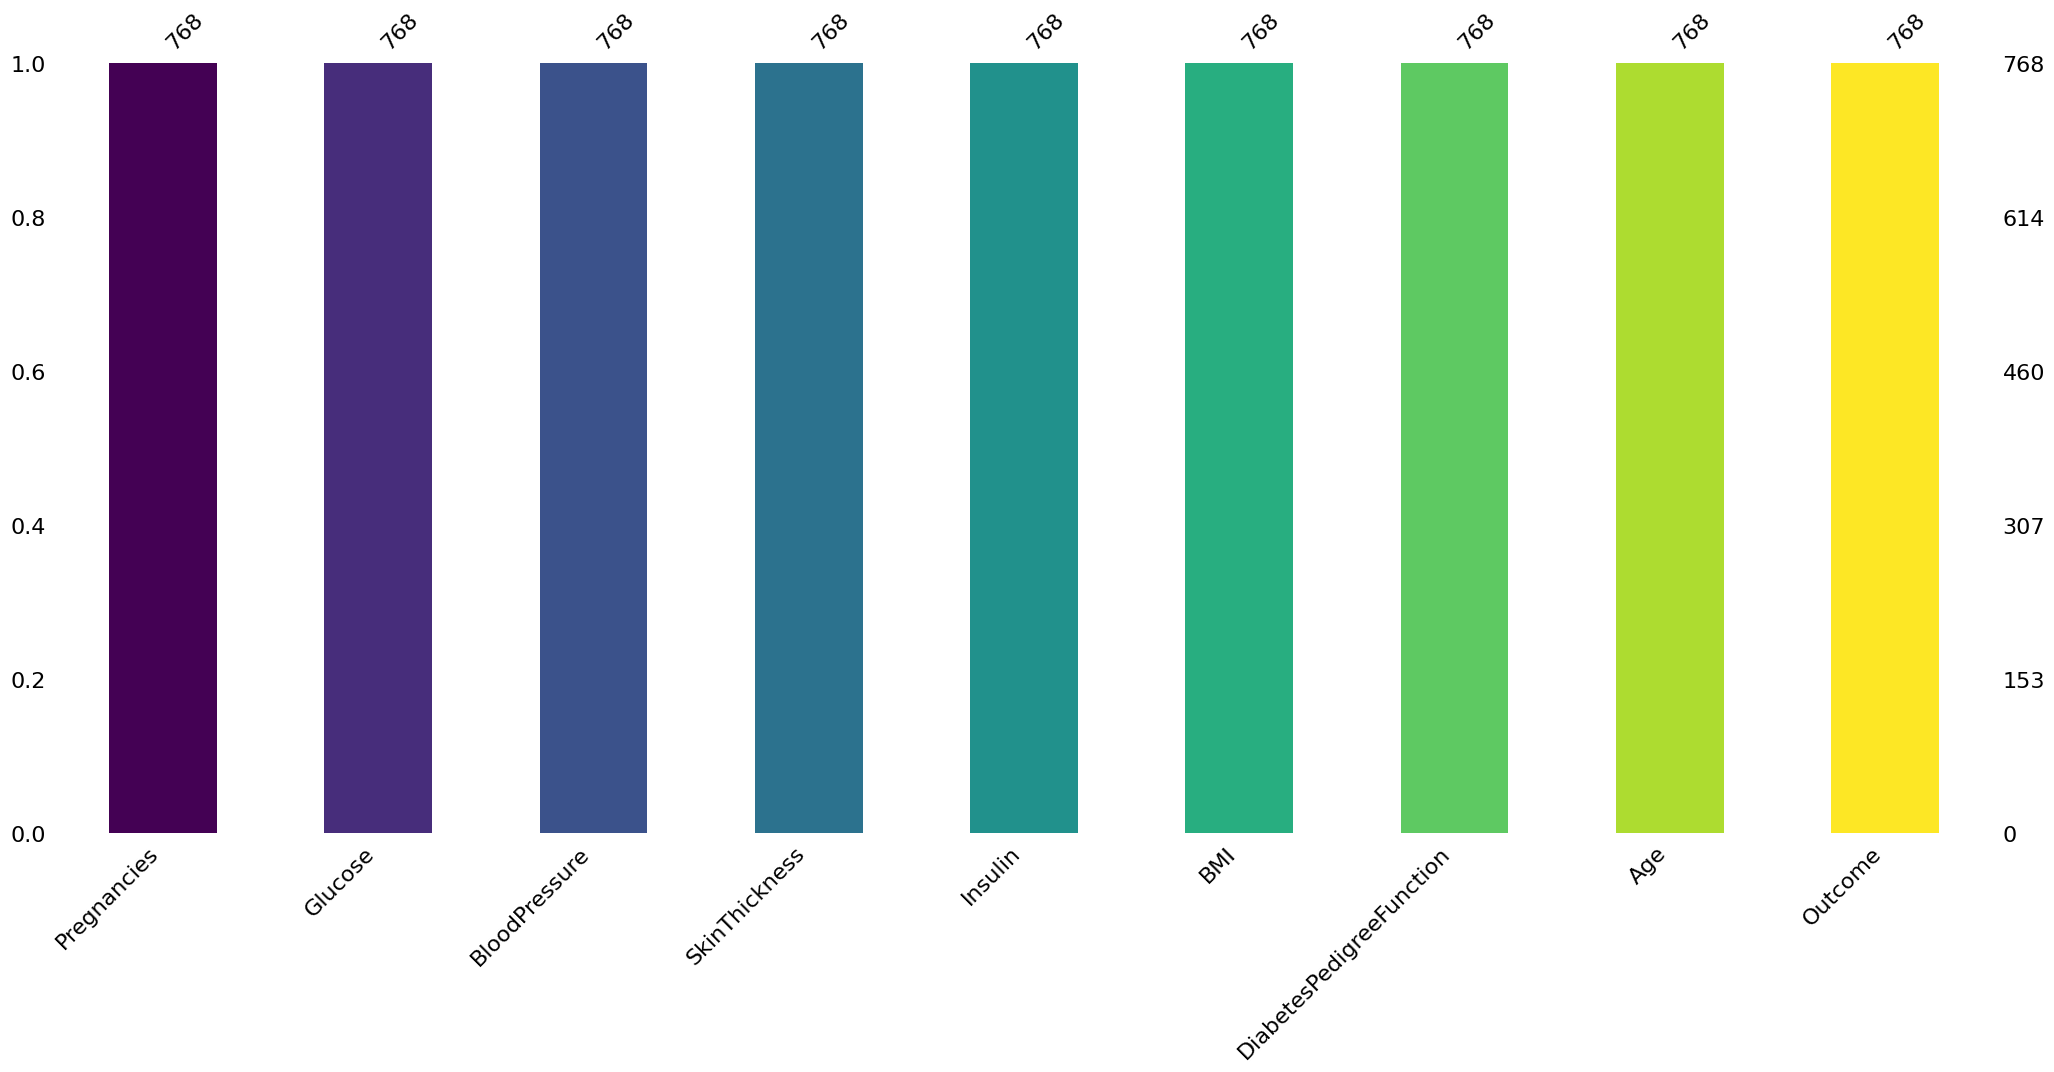

In [ ]:
import missingno as msno

# Get the number of columns in the dataframe
num_columns = len(df.columns)

# Generate a color map with as many colors as there are columns
colors = plt.cm.viridis(np.linspace(0, 1, num_columns))

# Create a bar plot using missingno to visualize missing data in the dataframe
# Each bar represents the count of non-missing values in each column
msno.bar(df, color=colors)

# Display the plot
plt.show()


*count of number of training data barchart from dataset*

In [ ]:
pip install missingno


**Data Cleaning**

In [ ]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [ ]:
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [ ]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

**Data visualization and Distributions of attributes**


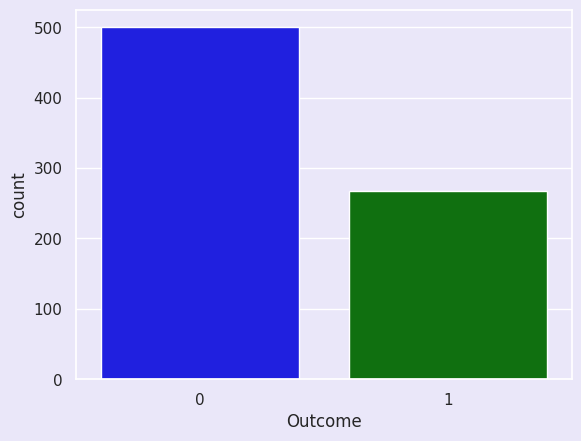

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot using seaborn to visualize the count of each category in the 'Outcome' column
# Use a custom palette to specify colors for the bars ('blue' for one category and 'green' for the other)
sns.countplot(x='Outcome', data=df, palette=['blue', 'green'])

# Display the plot
plt.show()

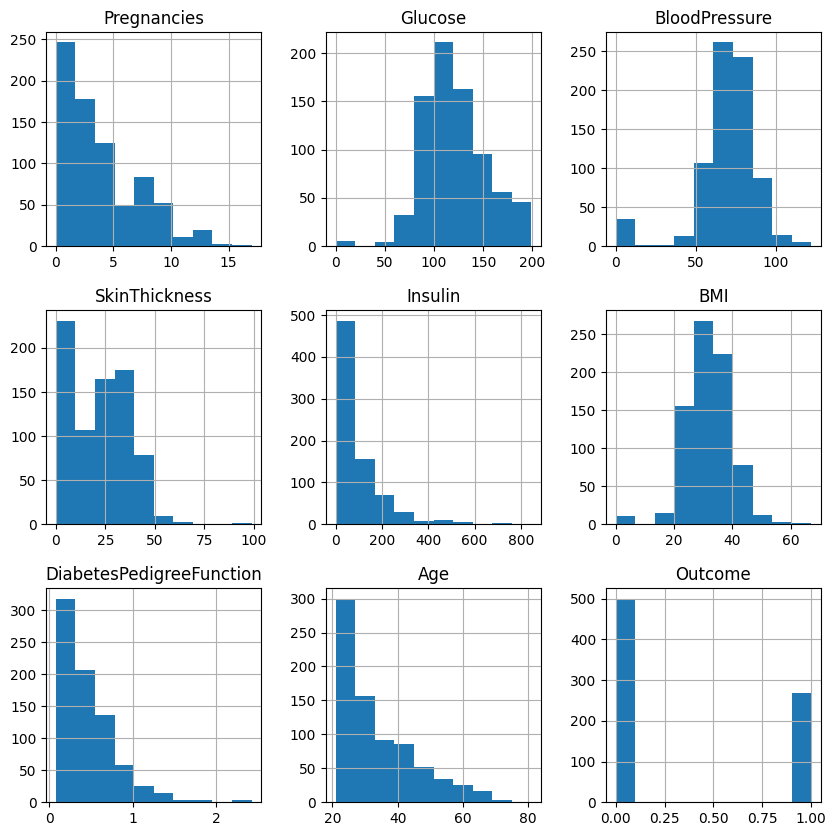

In [ ]:
##Plotting histograms for all columns for each feature
df.hist(figsize = (10,10))
plt.show()

*different distribution of attributes*

*# Plotting histograms for all columns in the DataFrame*

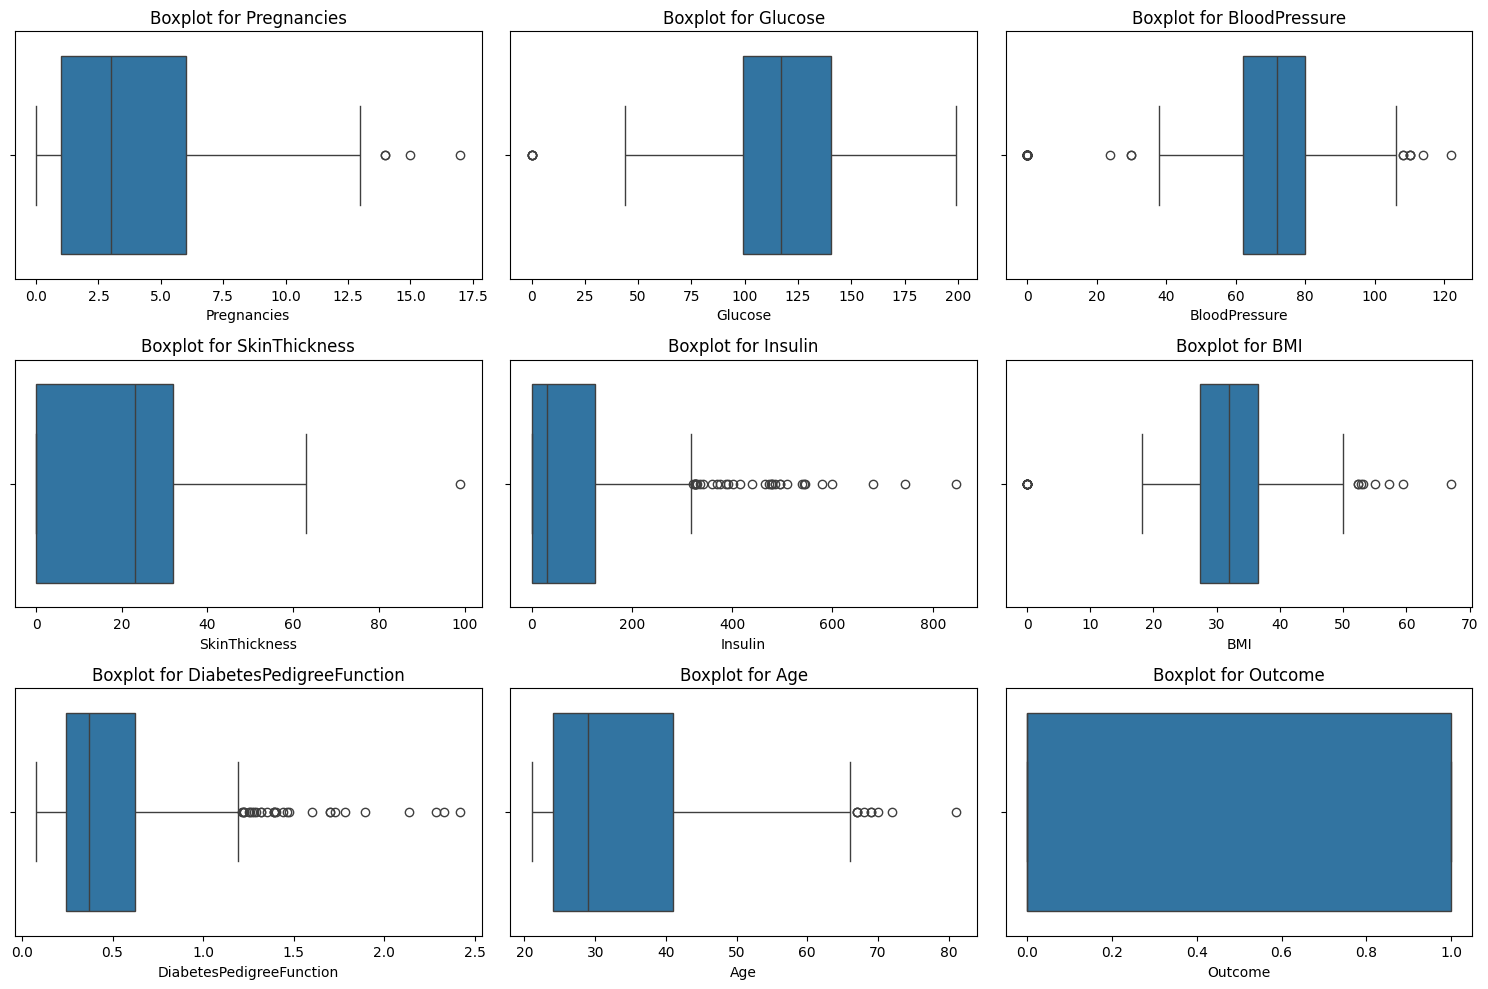

In [ ]:
##Plotting boxplot for all columns in the DataFrame
num_rows, num_cols = 3, 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Remove any remaining empty subplots
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])
# Adjust layout
plt.tight_layout()
plt.show()

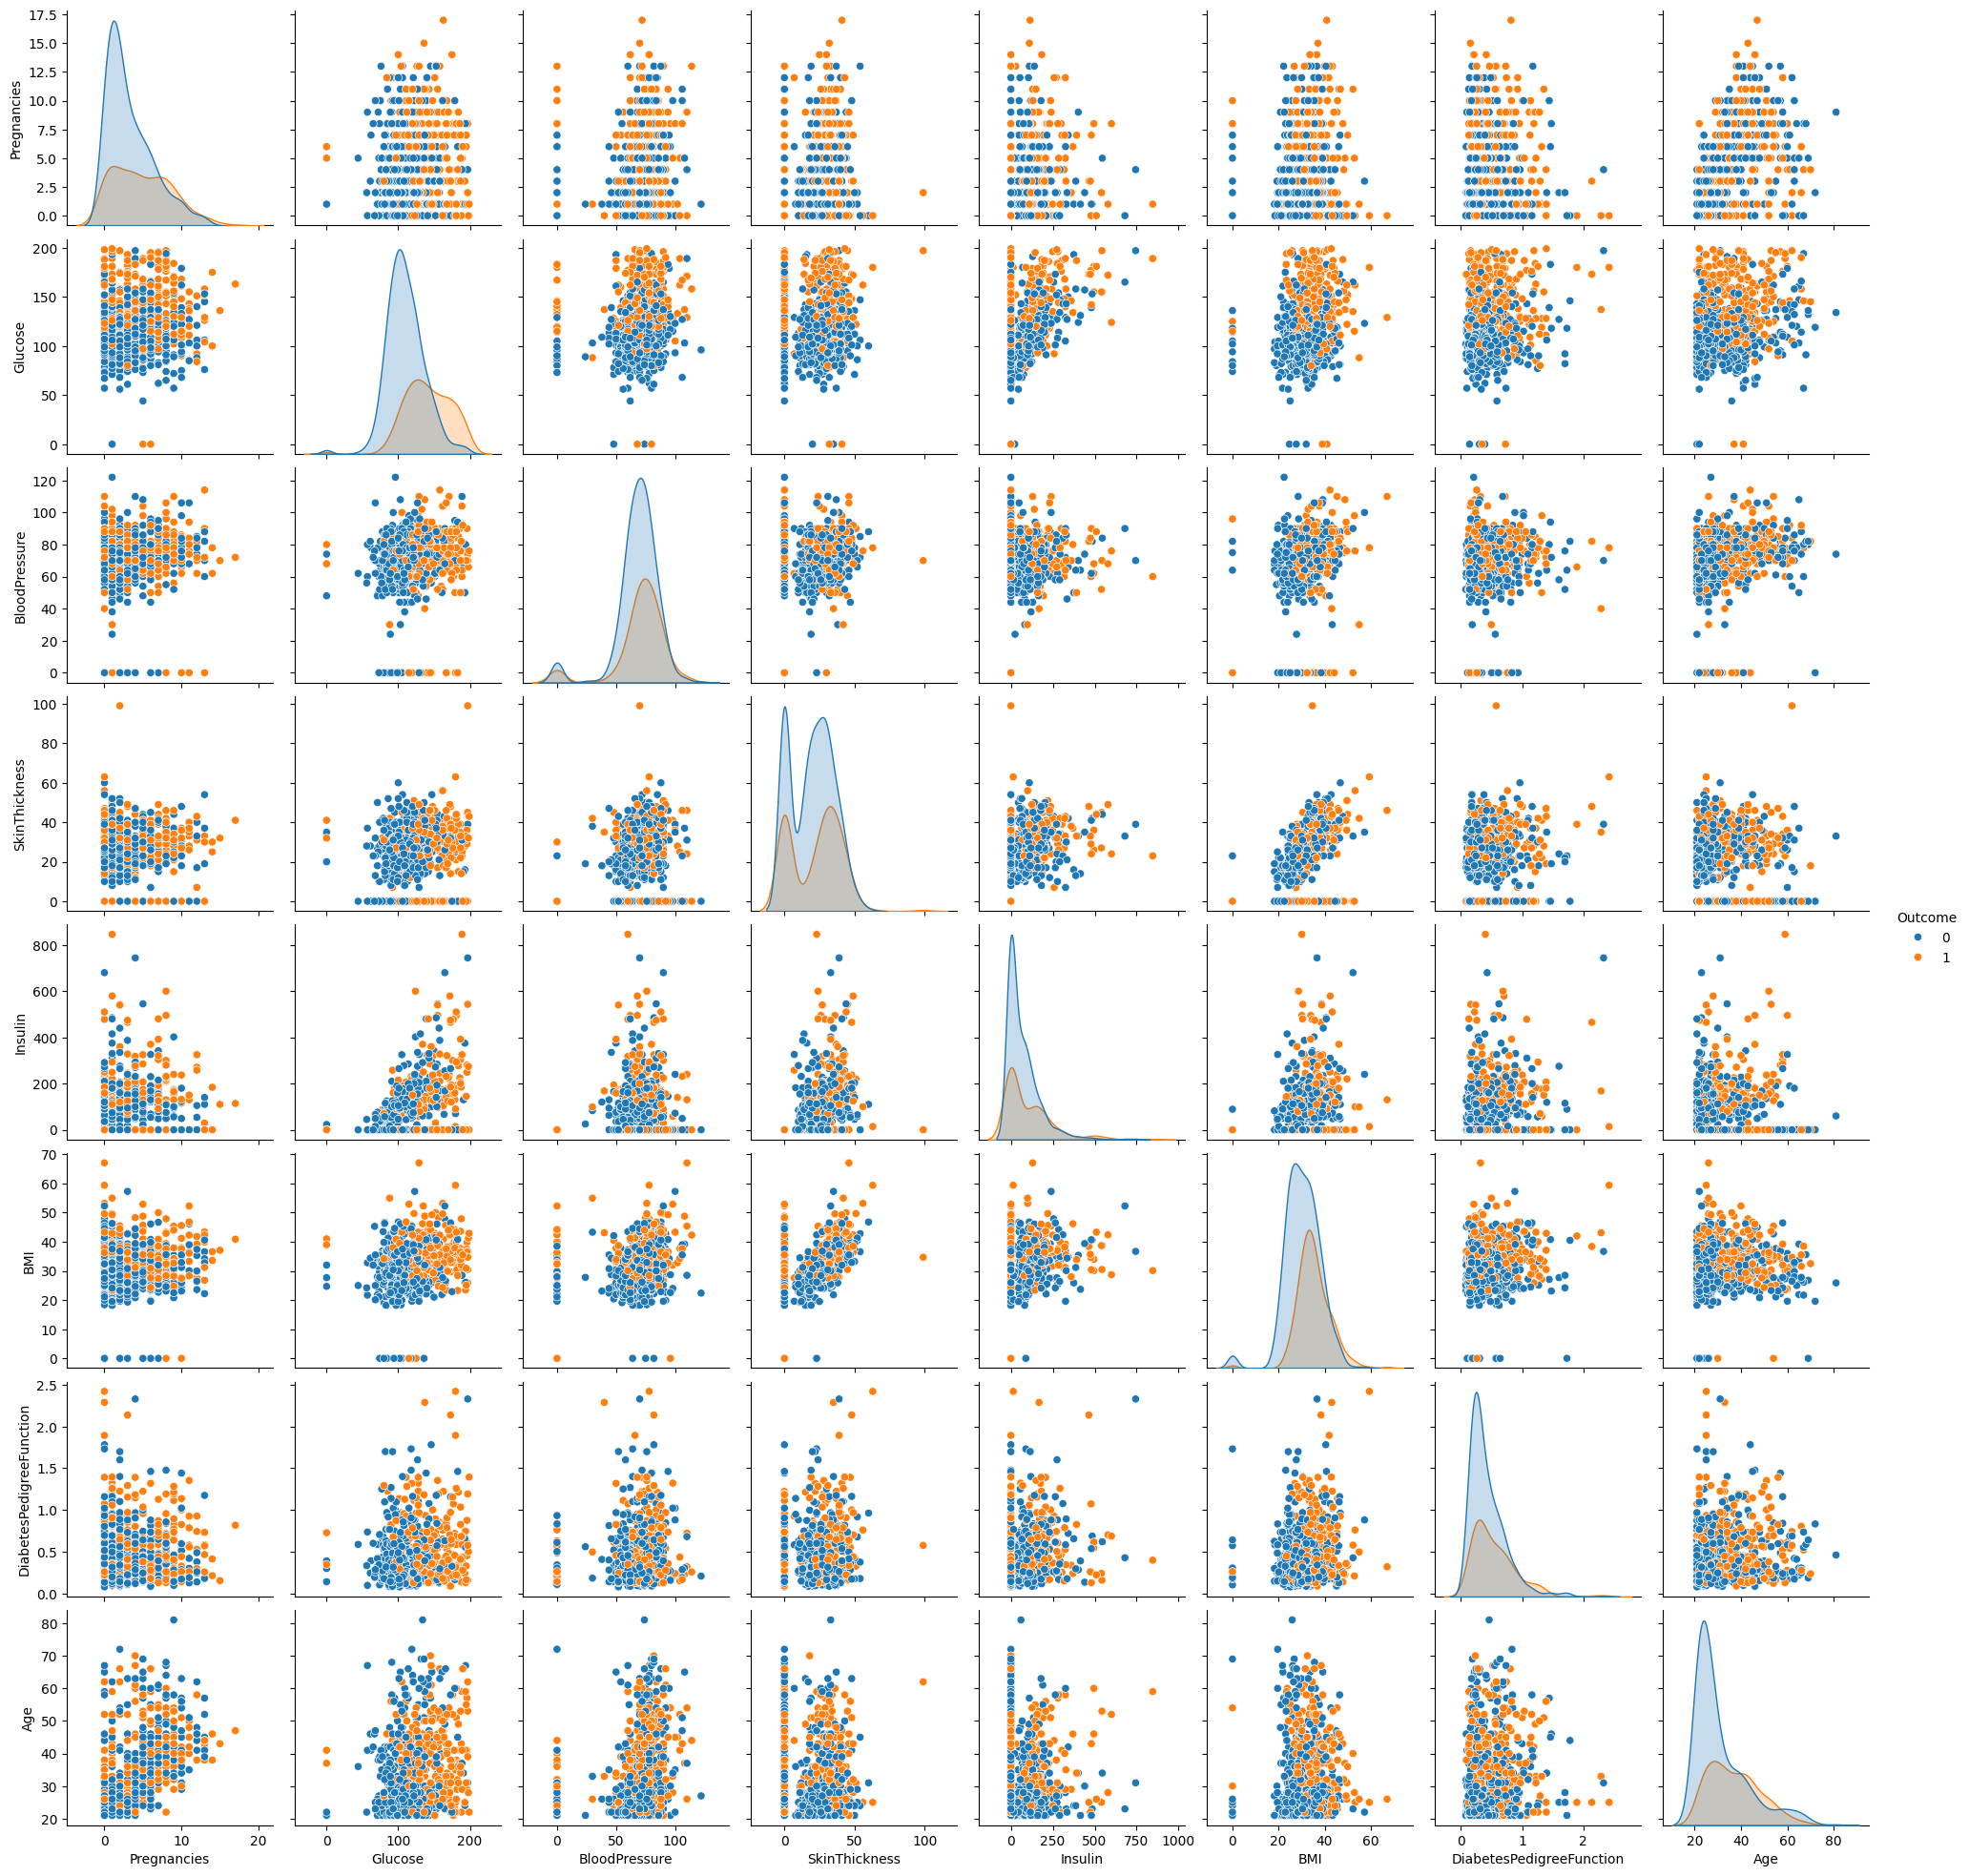

In [ ]:
## differnt attribute of pairplot
sns.pairplot(data = df, hue = 'Outcome' )
plt.show()

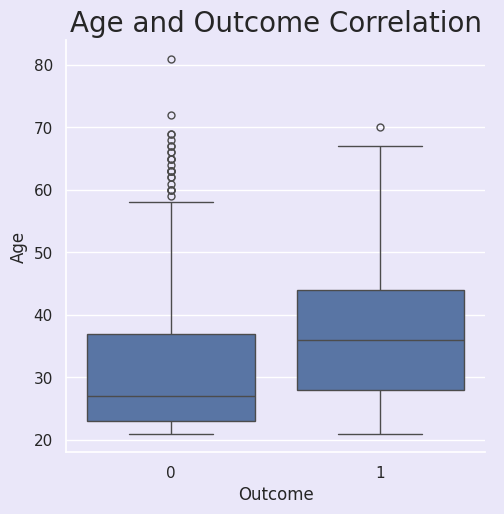

In [ ]:
##Setting the style and color of the plot's background using seaborn
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})

# Creating a box plot to visualize the relationship between 'Outcome' and 'Age' columns in the DataFrame 'df'
# 'x' is the Outcome column, 'y' is the Age column, and 'data' is the DataFrame
# 'kind' specifies the type of plot; in this case, it's a box plot
p=sns.catplot(x="Outcome",y="Age", data=df, kind='box')
plt.title("Age and Outcome Correlation", size=20, y=1.0);

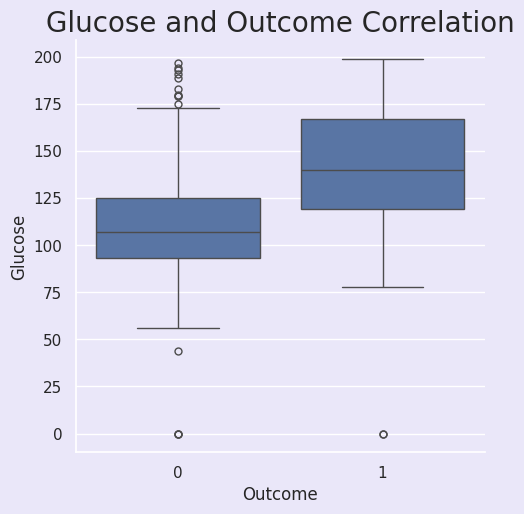

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background color for the plot and the figure using seaborn's rc parameters
sns.set(rc={"axes.facecolor":"#EAE7F9", "figure.facecolor":"#EAE7F9"})

# Create a box plot using seaborn's catplot to visualize the distribution of 'Glucose' values for each 'Outcome'
p = sns.catplot(x="Outcome", y="Glucose", data=df, kind='box')

# Set the title of the plot with a specified font size and position
plt.title("Glucose and Outcome Correlation", size=20, y=1.0)

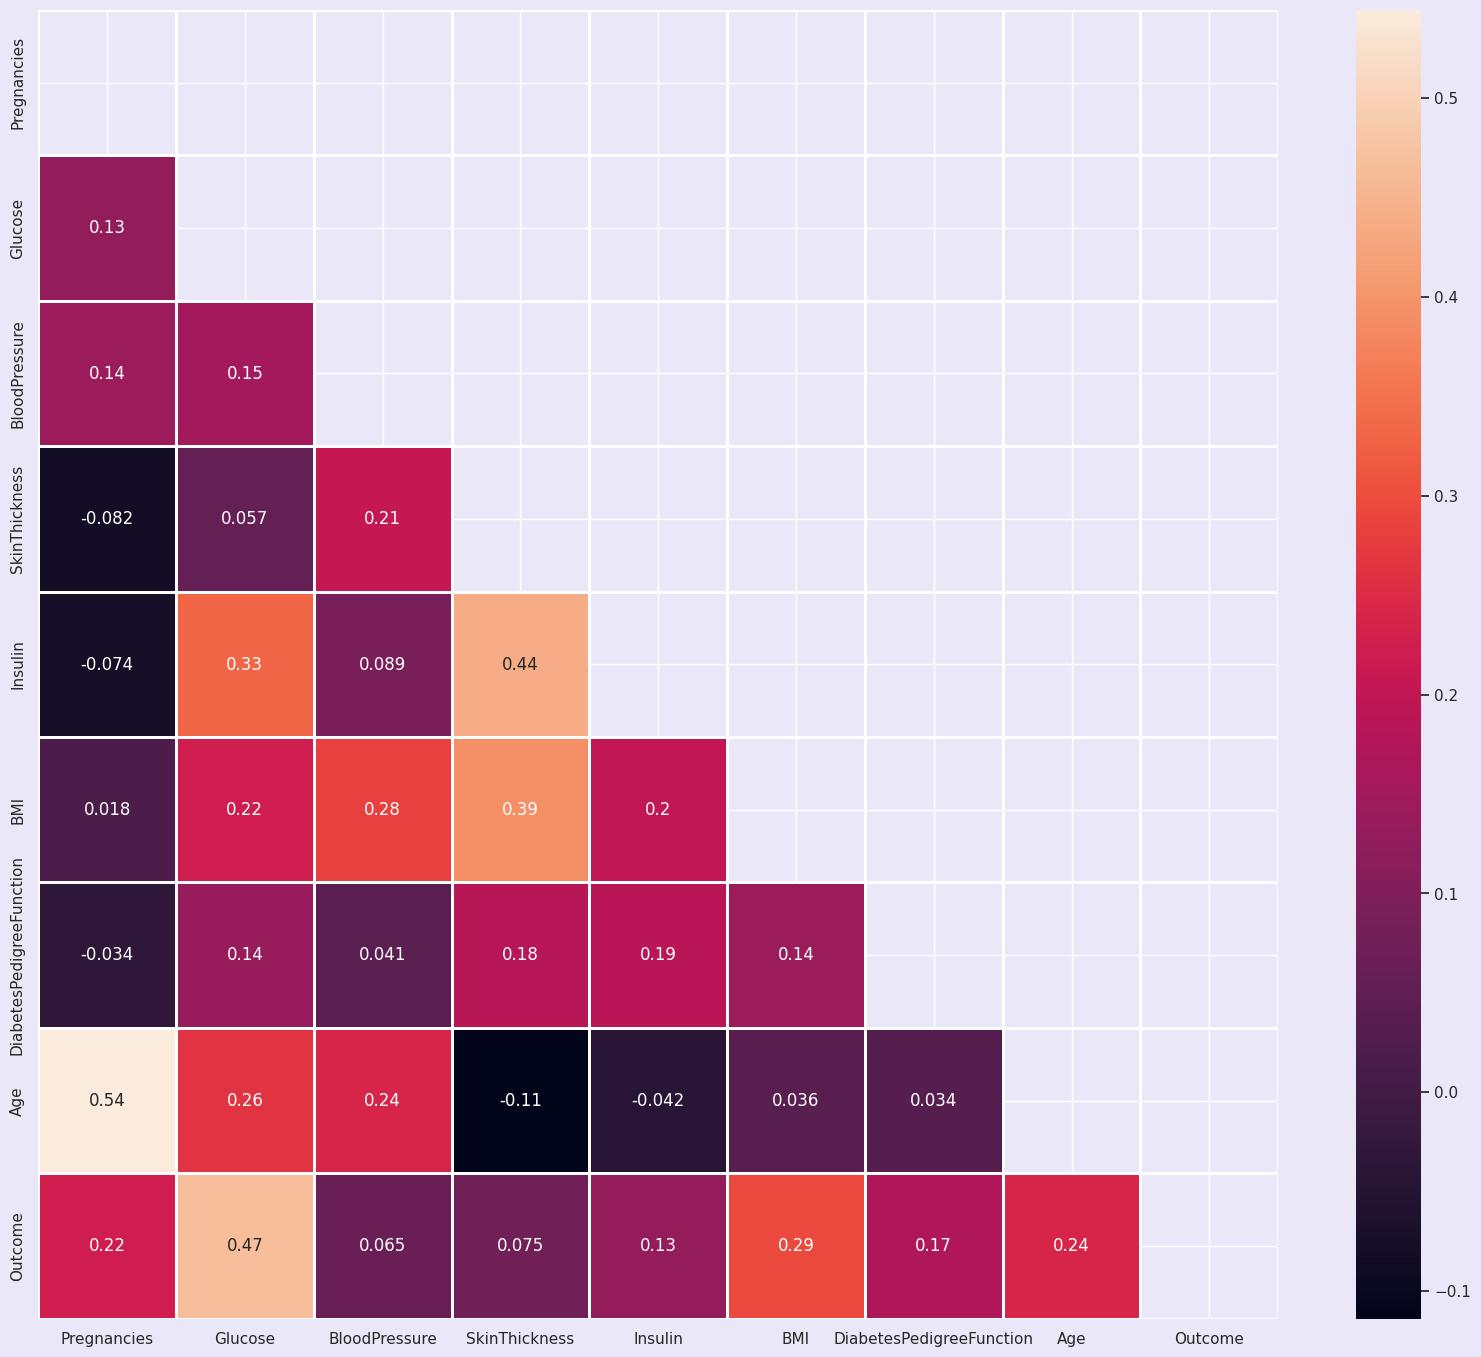

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the size of the figure
plt.figure(figsize=(20, 17))

# Calculate the correlation matrix of the DataFrame and mask the upper triangle
matrix = np.triu(df.corr())

# Create a heatmap to visualize the correlation matrix
# 'annot=True' adds the correlation values inside the heatmap cells
# 'linewidth=.8' specifies the width of the lines that divide the cells
# 'mask=matrix' applies the mask to the upper triangle of the correlation matrix
# 'cmap="rocket"' sets the color map to 'rocket'
sns.heatmap(df.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket")

# Display the heatmap
plt.show()


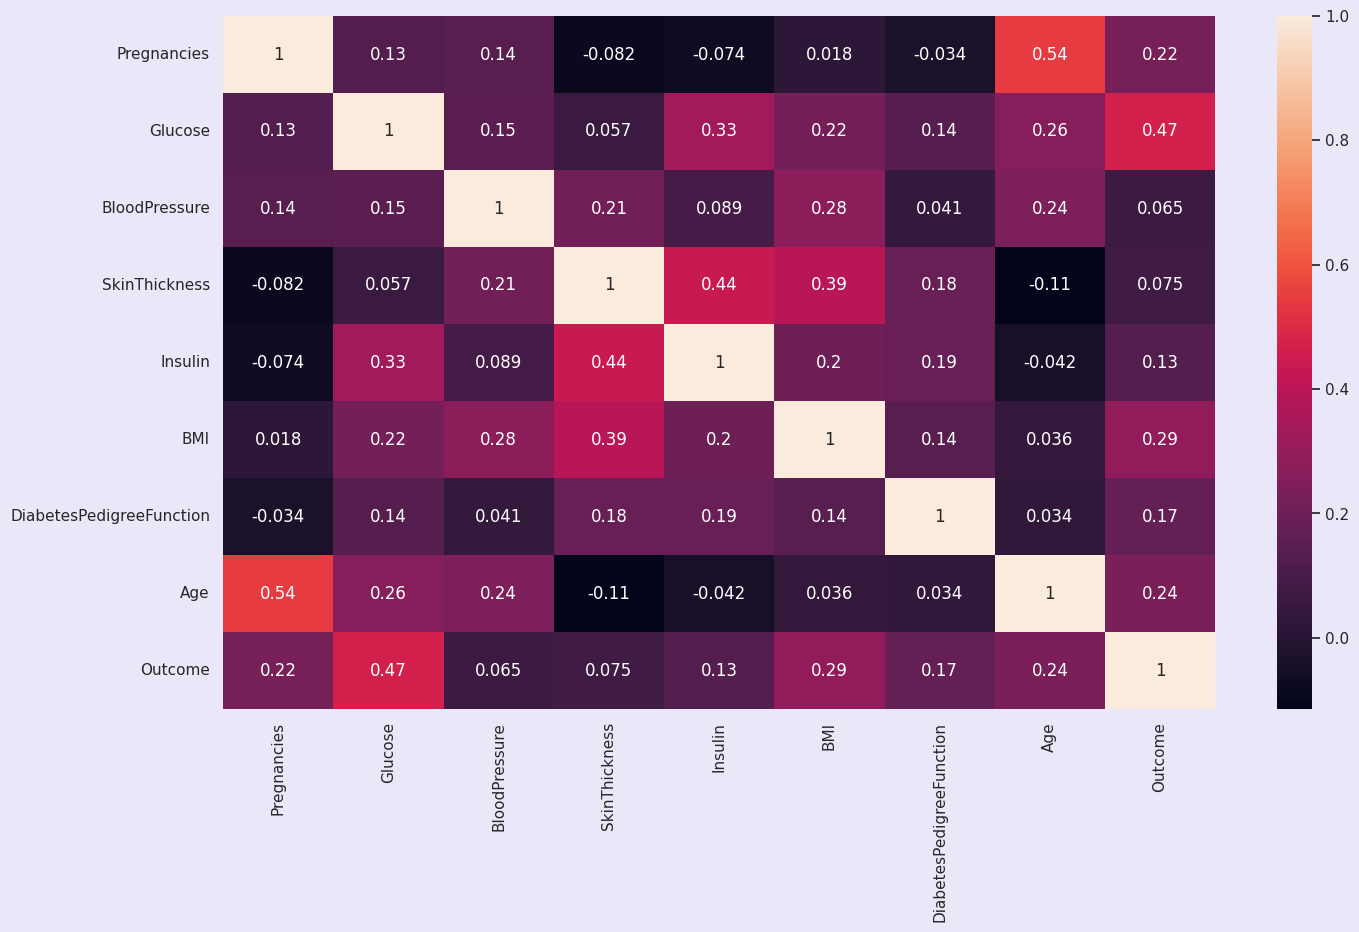

In [ ]:
# Plotting a heatmap of the correlation matrix of the DataFrame 'df' with seaborn
# annot=True displays the correlation values in the heatmap cells
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True);

In [ ]:
# Calculate the correlation matrix of the DataFrame
hig_corr = df.corr()

# Identify features that have a correlation of at least 0.2 (in absolute value) with the 'Outcome' column
hig_corr_features = hig_corr.index[abs(hig_corr["Outcome"]) >= 0.2]

# Display the highly correlated features
hig_corr_features

Index(['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

In [ ]:
#Standard Deviation

df.var()

Pregnancies                   11.354056
Glucose                     1022.248314
BloodPressure                374.647271
SkinThickness                254.473245
Insulin                     8770.036047
BMI                           62.159984
DiabetesPedigreeFunction       0.081621
Age                          138.303046
Outcome                        0.227483
dtype: float64

**Data Preprocessing**

In [ ]:
# List of numeric columns to handle outliers
numeric_columns = ['Insulin', 'DiabetesPedigreeFunction']

# Iterate through each numeric column
for column_name in numeric_columns:
    # Calculate the first quartile (Q1) and third quartile (Q3) using numpy's percentile function
    Q1 = np.percentile(df[column_name], 25, interpolation='midpoint')
    Q3 = np.percentile(df[column_name], 75, interpolation='midpoint')

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper limits to identify outliers
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    # Identify outliers in the specified column
    outliers = df[(df[column_name] < low_lim) | (df[column_name] > up_lim)][column_name]

    # Replace outliers with the respective lower or upper limit
    df[column_name] = np.where(df[column_name] < low_lim, low_lim, df[column_name])
    df[column_name] = np.where(df[column_name] > up_lim, up_lim, df[column_name])

In [ ]:
#Get `input` and `target` columns
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

**Splitting data for the training**

In [ ]:
#Splitting data for the training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

**Machine Learning models**

**Logistic Regression**

In [ ]:
# Importing the LogisticRegression class from the scikit-learn library
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

Accuracy: 79.15%
Accuracy: 72.08%


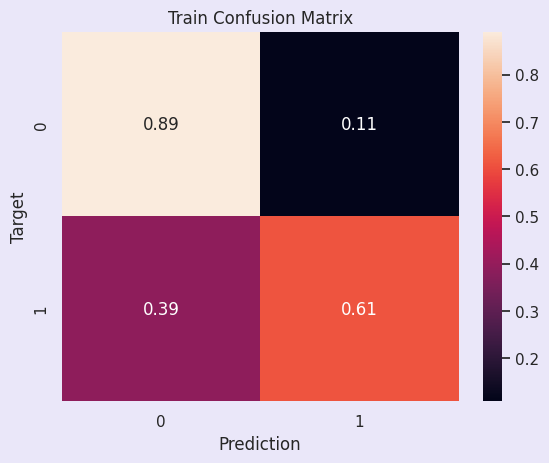

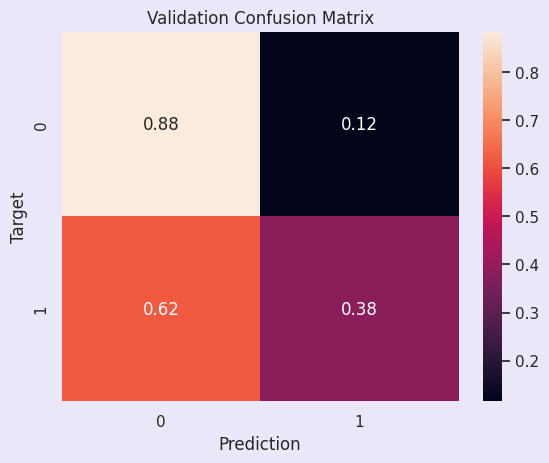

In [ ]:
# Import necessary libraries and functions
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to predict using the model, calculate accuracy, plot confusion matrix, and return predictions
def predict_and_plot(model, inputs, targets, name=''):
    # Make predictions using the model
    preds = model.predict(inputs)

    # Calculate accuracy score
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    # Calculate and plot confusion matrix
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    # Return predictions
    return preds

# Predict and plot on the training data
train_preds = predict_and_plot(log_reg, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(log_reg, X_test, y_test, 'Validation')


Evaluate: logistic regression Model: Before Tunning

Training Accuracy - 79.15%

Validation Accuracy - 72.08%

This model seems to be overfitting as training accuracy is very high and the validation accuracy is not so

**Hyperparameter Tuning of logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Assuming X_train, y_train, X_test, y_test are defined
# Initialize the logistic regression model
log_reg = LogisticRegression()

# Define parameter grid for hyperparameter tuning
param_grid = {

    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit to the training data
grid_search.fit(X_train, y_train)

# Use the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the training data with the best model
train_preds_best = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds_best)

# Predict on the validation data with the best model
val_preds_best = best_model.predict(X_test)
val_accuracy = accuracy_score(y_test, val_preds_best)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.7947882736156352
Validation Accuracy: 0.7207792207792207


Evaluate: logistic regression Model: Before Tunning

Training Accuracy - 79.15%

Validation Accuracy - 72.08%

It hasnot  reduced overfitting compared to the initial model.And  the accuracy seems same.

In [ ]:
# Import logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression

# Import classification metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

In [ ]:
lr_pred=reg.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       104
           1       0.58      0.42      0.49        50

    accuracy                           0.71       154
   macro avg       0.67      0.64      0.65       154
weighted avg       0.70      0.71      0.70       154


 F1:
 0.4883720930232558

 Precision score is:
 0.5833333333333334

 Recall score is:
 0.42


**Random Forest**

In [ ]:
# Importing necessary libraries and functions
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_2.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model_2.score(X_train,y_train)

1.0

Accuracy: 100.00%
Accuracy: 92.21%


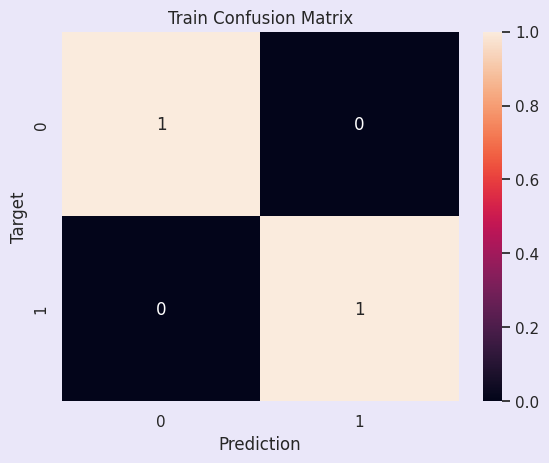

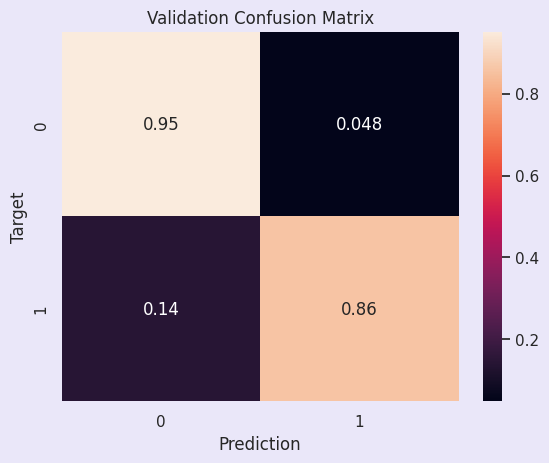

In [ ]:
def predict_and_plot(model, inputs, targets, name=''):
    # Make predictions using the model
    preds = model.predict(inputs)

    # Calculate accuracy score
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    # Calculate and plot confusion matrix
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    # Return predictions
    return preds

# Predict and plot on the training data
train_preds = predict_and_plot(model_2, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(model_2, X_test, y_test, 'Validation')

Evaluate: Random Forest Model: Before Tunning

Training Accuracy - 100%

Validation Accuracy - 92.21%

This model seems to be overfitting as training accuracy is very high and the validation accuracy is not so.



**Hyperparameter Tuning of Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 20, 30],  # Adjust the number of trees in the forest
    'max_depth': [10, 20, 30],  # Adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Adjust the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Adjust the minimum samples required in a leaf node
}

# Initialize the Random Forest Classifier with specified parameters
model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform Grid Search Cross-Validation to find the best model
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Evaluate the best model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.8925081433224755
Validation Accuracy: 0.8246753246753247


Evaluate: Random Forest Model After Hyper Parametic Tunning

Training Accuracy - 89.2%

Validation Accuracy - 84.6%

It has reduced overfitting compared to the initial model.And Improve the accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [ ]:
rf_pred=best_model.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       104
           1       0.62      0.40      0.49        50

    accuracy                           0.73       154
   macro avg       0.69      0.64      0.65       154
weighted avg       0.71      0.73      0.71       154


 F1:
 0.48780487804878053

 Precision score is:
 0.625

 Recall score is:
 0.4


In [ ]:
#Decison tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Creating a DecisionTreeClassifier model with default parameters and a fixed random state (for reproducibility)
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fitting the DecisionTreeClassifier model to the training data
decision_tree_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = decision_tree_model.score(X_train, y_train)
val_accuracy = decision_tree_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 1.0
Validation Accuracy: 0.6818181818181818


Evaluate: Decision Tree Model: Before Tunning

Training Accuracy - 100%

Validation Accuracy - 68.0%

Tree model is overfitting the training data, as it's achieving perfect accuracy on the training data but lower accuracy on the validation data..

**Hyperparameter Tuning Of Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']  # Add criterion hyperparameter
}

# Creating a DecisionTreeClassifier model with a fixed random state
decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Training the best model on the training data with the best parameters
best_model.fit(X_train, y_train)

# Evaluating the best model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Printing the results

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.8322475570032574
Validation Accuracy: 0.7402597402597403


Evaluate: Decision Tree Model

Training Accuracy - 83.2%
Validation Accuracy - 75.5%

It has reduced overfitting compared to the initial model And Improve the result.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
dt_pred=best_model.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       104
           1       0.62      0.40      0.49        50

    accuracy                           0.73       154
   macro avg       0.69      0.64      0.65       154
weighted avg       0.71      0.73      0.71       154


 F1:
 0.48780487804878053

 Precision score is:
 0.625

 Recall score is:
 0.4


**KNeighborsClassifier Model**

Training Accuracy: 0.8045602605863192
Validation Accuracy: 0.6688311688311688


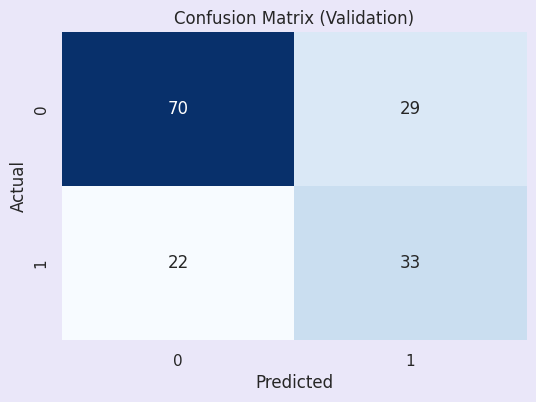

In [ ]:
# Importing KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing KNeighborsClassifier with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fitting the KNN model to the training data
knn_model.fit(X_train, y_train)

# Predicting on training and validation sets
y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)

# Calculating accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Printing accuracy scores
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Generating confusion matrix for validation set
confusion = confusion_matrix(y_val, y_val_pred)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#Predict testing set
knn_pred = best_model.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       104
           1       0.62      0.40      0.49        50

    accuracy                           0.73       154
   macro avg       0.69      0.64      0.65       154
weighted avg       0.71      0.73      0.71       154


 F1:
 0.48780487804878053

 Precision score is:
 0.625

 Recall score is:
 0.4


**Hyperparameter Tuning of KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9]  # Adjust the number of neighbors to explore
}

# Initialize KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Setup GridSearchCV with 5-fold cross-validation and accuracy scoring
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best model
grid_search.fit(X_train, y_train)

# Get the best estimator/model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on training and validation sets using the best model
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the results
print("Training Accuracy with Best Hyperparameters:", train_accuracy)
print("Validation Accuracy with Best Hyperparameters:", val_accuracy)

Training Accuracy with Best Hyperparameters: 0.7947882736156352
Validation Accuracy with Best Hyperparameters: 0.7272727272727273


Evaluate: KNN After the Tunning

Training Accuracy - 79.4%

Validation Accuracy - 72.7%


**Support Vector Classifier**

Training Accuracy: 0.7785016286644951
Validation Accuracy: 0.7727272727272727


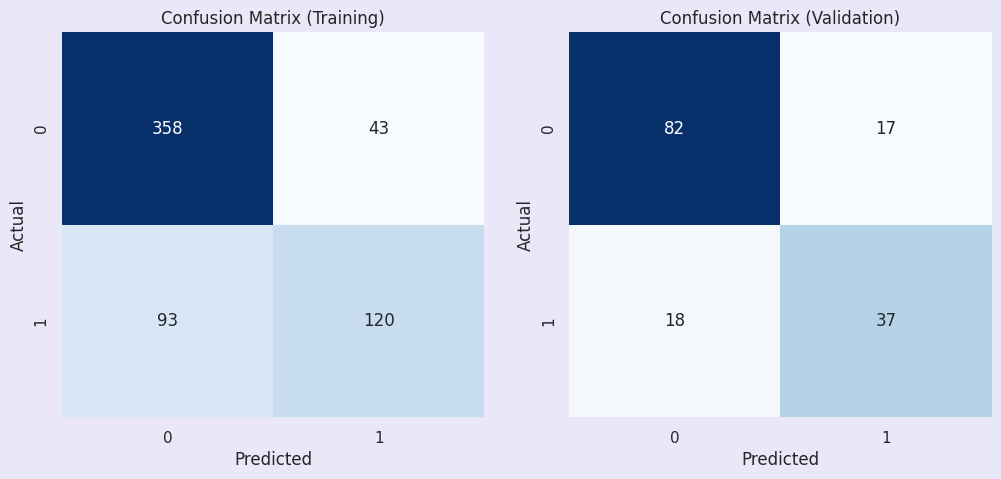

In [ ]:
# Importing necessary libraries and functions
from sklearn.model_selection import train_test_split  # For splitting data into training and validation sets
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score, confusion_matrix  # Evaluation metrics
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization library

# Splitting the dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing SVM classifier with a linear kernel
svm_model = SVC(kernel='linear')

# Fitting the SVM model to the training data
svm_model.fit(X_train, y_train)

# Predicting on training and validation sets
y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)

# Calculating accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Printing accuracy scores
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Generating confusion matrices for training and validation sets
train_confusion = confusion_matrix(y_train, y_train_pred)
val_confusion = confusion_matrix(y_val, y_val_pred)

# Plotting confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')

plt.tight_layout()
plt.show()


Evaluate: SVC
Training Accuracy - 77.8%
Validation Accuracy - 77.2%

**AdaBoost Classifier**

AdaBoost Training Accuracy: 0.8224755700325733
AdaBoost Validation Accuracy: 0.7402597402597403


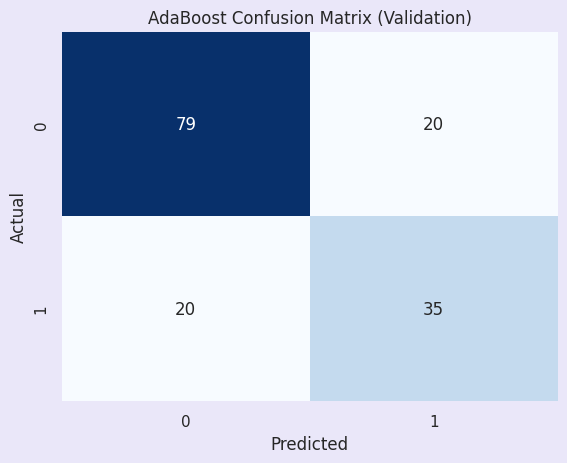

In [ ]:
from sklearn.ensemble import AdaBoostClassifier  # Importing AdaBoost classifier
from sklearn.metrics import accuracy_score, confusion_matrix  # Importing metrics for evaluation
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for visualization

# Initialize AdaBoost classifier with 50 estimators and random state for reproducibility
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit AdaBoost model to the training data
adaboost_model.fit(X_train, y_train)

# Predict on training and validation sets
y_train_pred_adaboost = adaboost_model.predict(X_train)
y_val_pred_adaboost = adaboost_model.predict(X_val)

# Calculate accuracy scores
train_accuracy_adaboost = accuracy_score(y_train, y_train_pred_adaboost)
val_accuracy_adaboost = accuracy_score(y_val, y_val_pred_adaboost)

# Print accuracy scores
print("AdaBoost Training Accuracy:", train_accuracy_adaboost)
print("AdaBoost Validation Accuracy:", val_accuracy_adaboost)

# Generate confusion matrix for validation set
confusion_adaboost = confusion_matrix(y_val, y_val_pred_adaboost)

# Plot the confusion matrix
plt.figure()
sns.heatmap(confusion_adaboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('AdaBoost Confusion Matrix (Validation)')
plt.show()

**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fit the GBM model to the training data
gbm_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_gbm = gbm_model.predict(X_train)

# Make predictions on the validation data
y_val_pred_gbm = gbm_model.predict(X_val)

# Calculate the training accuracy
train_accuracy_gbm = accuracy_score(y_train, y_train_pred_gbm)

# Calculate the validation accuracy
val_accuracy_gbm = accuracy_score(y_val, y_val_pred_gbm)

# Print the training and validation accuracies
print("GBM Training Accuracy:", train_accuracy_gbm)
print("GBM Validation Accuracy:", val_accuracy_gbm)

GBM Training Accuracy: 0.9429967426710097
GBM Validation Accuracy: 0.7532467532467533


Evaluate: Gradient Boosting Classifier

Training Accuracy - 94.2%

Validation Accuracy - 75.3%

**xgboost Classifier**

In [ ]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgboost_model = XGBClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fit the XGBoost model to the training data
xgboost_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_xgboost = xgboost_model.predict(X_train)

# Make predictions on the validation data
y_val_pred_xgboost = xgboost_model.predict(X_val)

# Calculate the training accuracy
train_accuracy_xgboost = accuracy_score(y_train, y_train_pred_xgboost)

# Calculate the validation accuracy
val_accuracy_xgboost = accuracy_score(y_val, y_val_pred_xgboost)

# Print the training and validation accuracies
print("XGBoost Training Accuracy:", train_accuracy_xgboost)
print("XGBoost Validation Accuracy:", val_accuracy_xgboost)

XGBoost Training Accuracy: 0.9853420195439739
XGBoost Validation Accuracy: 0.6948051948051948


Evaluate: xgboost Classifier
'
Training Accuracy - 98.4%

Validation Accuracy - 69.7%